In [21]:
library(ggplot2)
library(reshape2)
library(dplyr)
library(tidyr)
library(car)
library(lmtest)
library(nortest)
library(multcomp)
library(emmeans)

In [2]:
# READING the DATA : 

In [3]:
x = read.delim("input.txt", header = T, sep="\t", stringsAsFactors = FALSE)
colnames(x)

[1] "subject"         "timepoint"       "analyte_value"   "marker"         
[5] "treatment_group"

In [4]:
# DATA EXPLORATION : 

In [5]:
print("the subjects enrolled in the study :")
table(x$subject)
print("the number of subjects is :")
length(unique(x$subject))
print("the timepoints :")
table(x$timepoint)
print("the markers :")
table(x$marker)
print("the treatment groups :")
table(x$treatment_group)

[1] "the subjects enrolled in the study :"



 A  B  C  D  E  F  G  H  J  K  L  M  N  P  Q  R  S  T  U  V  W 
12 15 15 15 15  9 15  3  9 15  5 12 15 15 12 12 15 12 15  6 12 

[1] "the number of subjects is :"


[1] 21

[1] "the timepoints :"



 DAY1 DAY15 DAY22 DAY29  DAY8 
   56    51    48    45    54 

[1] "the markers :"



C4 C8 TG 
85 85 84 

[1] "the treatment groups :"



TA TB TC 
83 87 84 

In [6]:
# coding subject, timepoint, marker, treatment_group as FACTORS

x$subject <- factor(x$subject)
x$timepoint <- factor(x$timepoint)
x$marker <- factor(x$marker)
x$treatment_group <- factor(x$treatment_group)

# ensuring that 'timepoint' is a factor with the desired order of days
x$timepoint <- factor(x$timepoint, levels = c("DAY1", "DAY8", "DAY15", "DAY22", "DAY29"))

In [7]:
# 1. Longitudinal plotting: Please construct a graph with timepoints on the x-axis, analyte value on the y-axis. 
# Each subject should be a line. 
# Use shape, color and faceting to represent other aspects of the longitudinal data

In [8]:
# Define 21 shape values
# http://www.cookbook-r.com/Graphs/Shapes_and_line_types/

shape_values <- c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21)

# Define 21 line types

line_types <- c(
  "solid",      # Length 1
  "dashed",     # Length 2
  "dotted",     # Length 2
  "dotdash",    # Length 2
  "longdash",   # Length 2
  "twodash",    # Length 2
  "11",         # Length 2
  "22",         # Length 2
  "33",         # Length 2
  "44",         # Length 2
  "55",         # Length 2
  "66",         # Length 2
  "77",         # Length 2
  "88",         # Length 2
  "99",         # Length 2
  "1212",       # Length 4
  "1313",       # Length 4
  "1414",       # Length 4
  "1515",       # Length 4
  "1616",       # Length 4
  "1717"        # Length 4
)

In [9]:
# possibility 1 of visualization : each subject is coded by a COLOR and a SHAPE

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


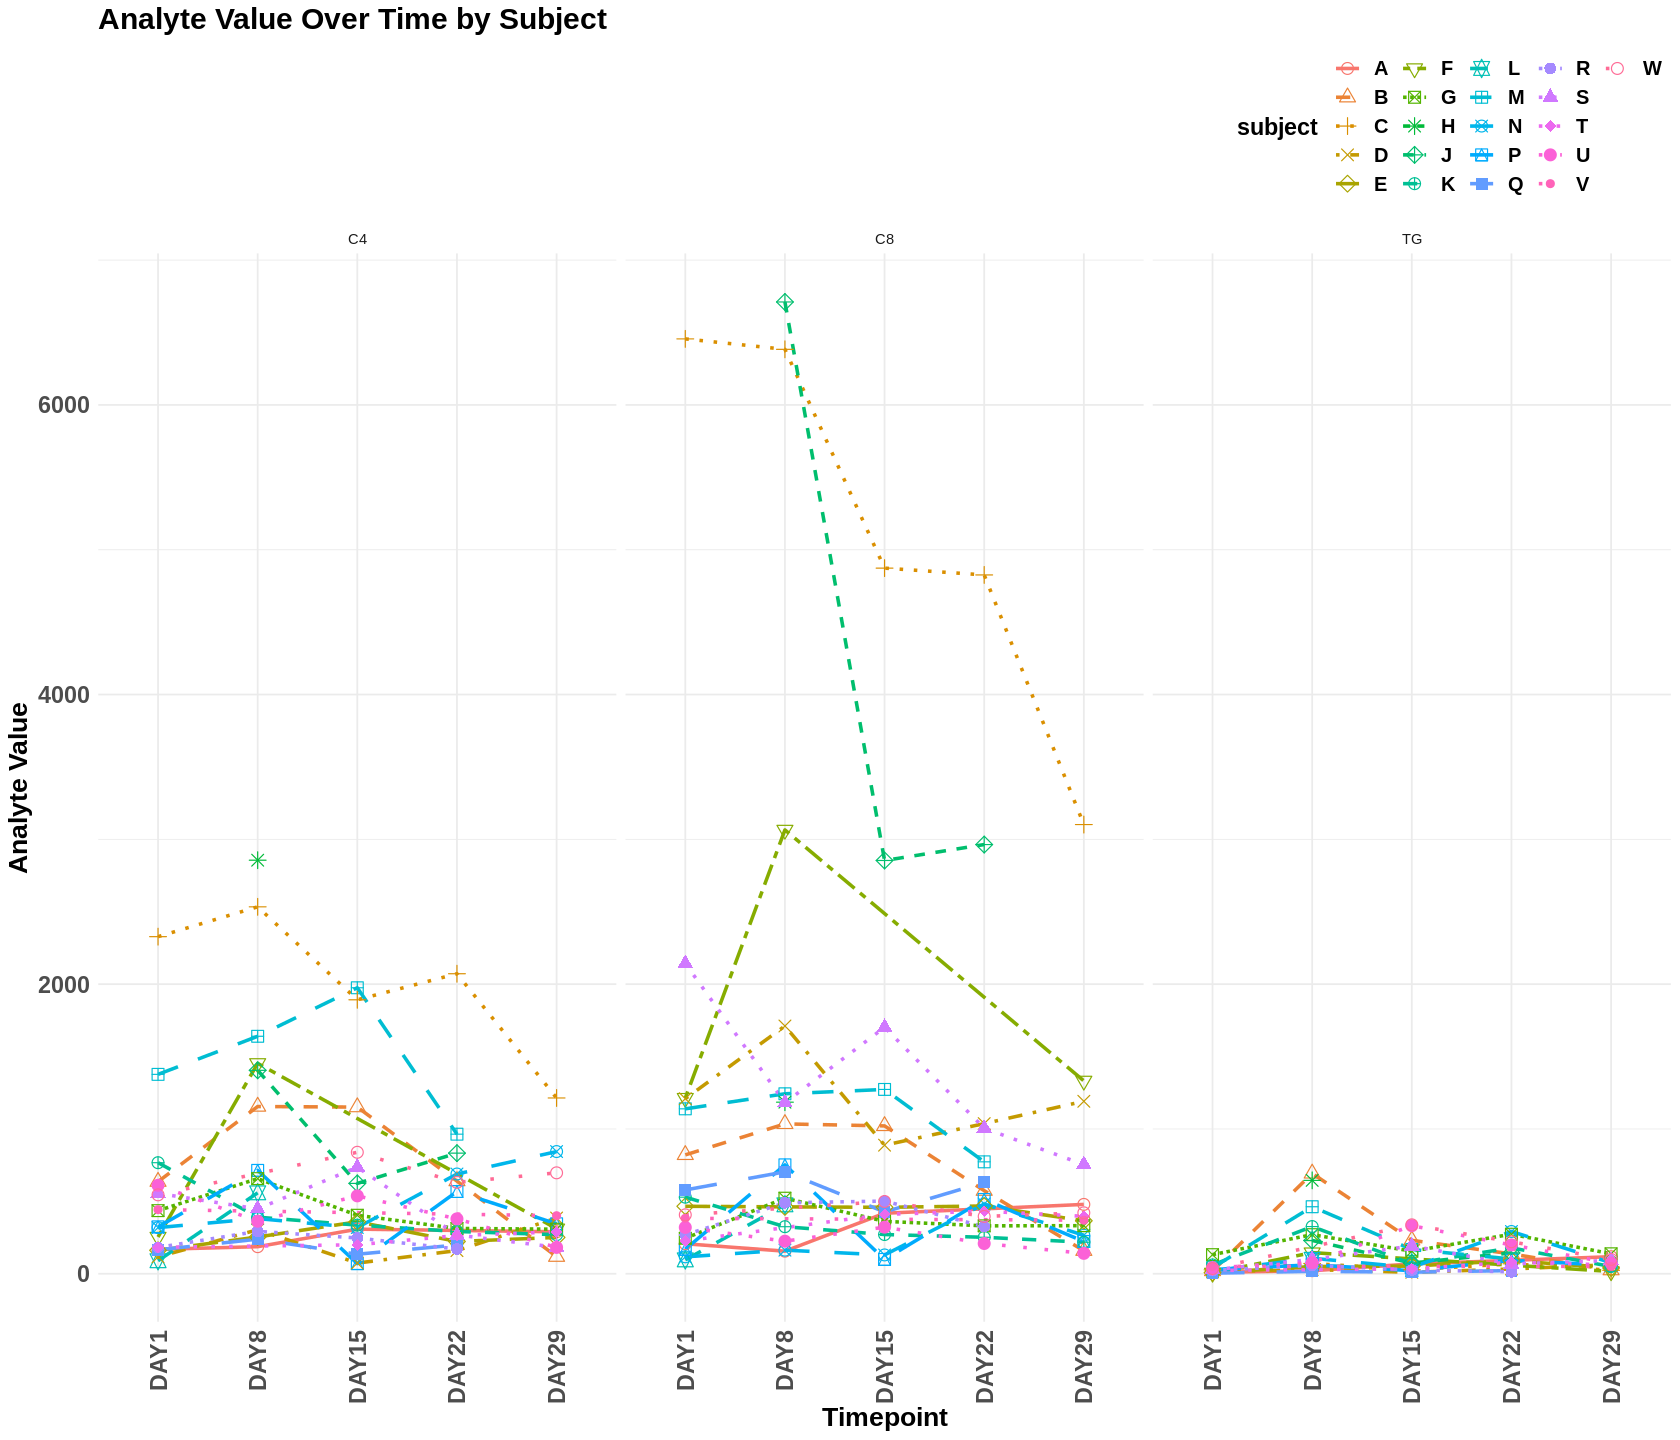

In [10]:
# Each subject is coded by a COLOR and a SHAPE

options(repr.plot.width = 14, repr.plot.height = 12)

p <- ggplot(x, aes(x = timepoint, y = analyte_value, group = subject, color = subject, linetype = subject, shape = subject)) +
  geom_line(size = 1) +  # Line for each subject, colored by subject
  geom_point(size = 3) +  # Points for each measurement, shaped by subject
  facet_wrap(~ marker) +  # Faceting by marker
  labs(title = "Analyte Value Over Time by Subject", x = "Timepoint", y = "Analyte Value") +
  scale_linetype_manual(values = line_types) +  # Apply custom line types
  scale_shape_manual(values = shape_values) +  # Apply custom shapes
  theme_minimal() +
  theme(
    legend.position = "top",  # Position legends at the top
    legend.box = "horizontal",  # Arrange legends horizontally
    legend.justification = c(1, 1),  # Justify legend to the top right
    axis.text.x = element_text(size = 14, angle = 90, vjust = 0.5, hjust = 1, face = "bold"),  # Increase size and thickness of x-axis labels
    axis.text.y = element_text(size = 14, face = "bold"),  # Increase size and thickness of y-axis labels
    axis.title.x = element_text(size = 16, face = "bold"),  # Increase size and thickness of x-axis title
    axis.title.y = element_text(size = 16, face = "bold"),  # Increase size and thickness of y-axis title
    plot.title = element_text(size = 18, face = "bold"),  # Increase size and thickness of plot title
    legend.text = element_text(size = 12, face = "bold"),  # Increase size and thickness of legend text
    legend.title = element_text(size = 14, face = "bold")  # Increase size and thickness of legend title
  ) 
# Print the plot
print(p)

In [11]:
# possibility 2 of visualization : each subject is coded by a COLOR, the Treatment Group is coded by a SHAPE

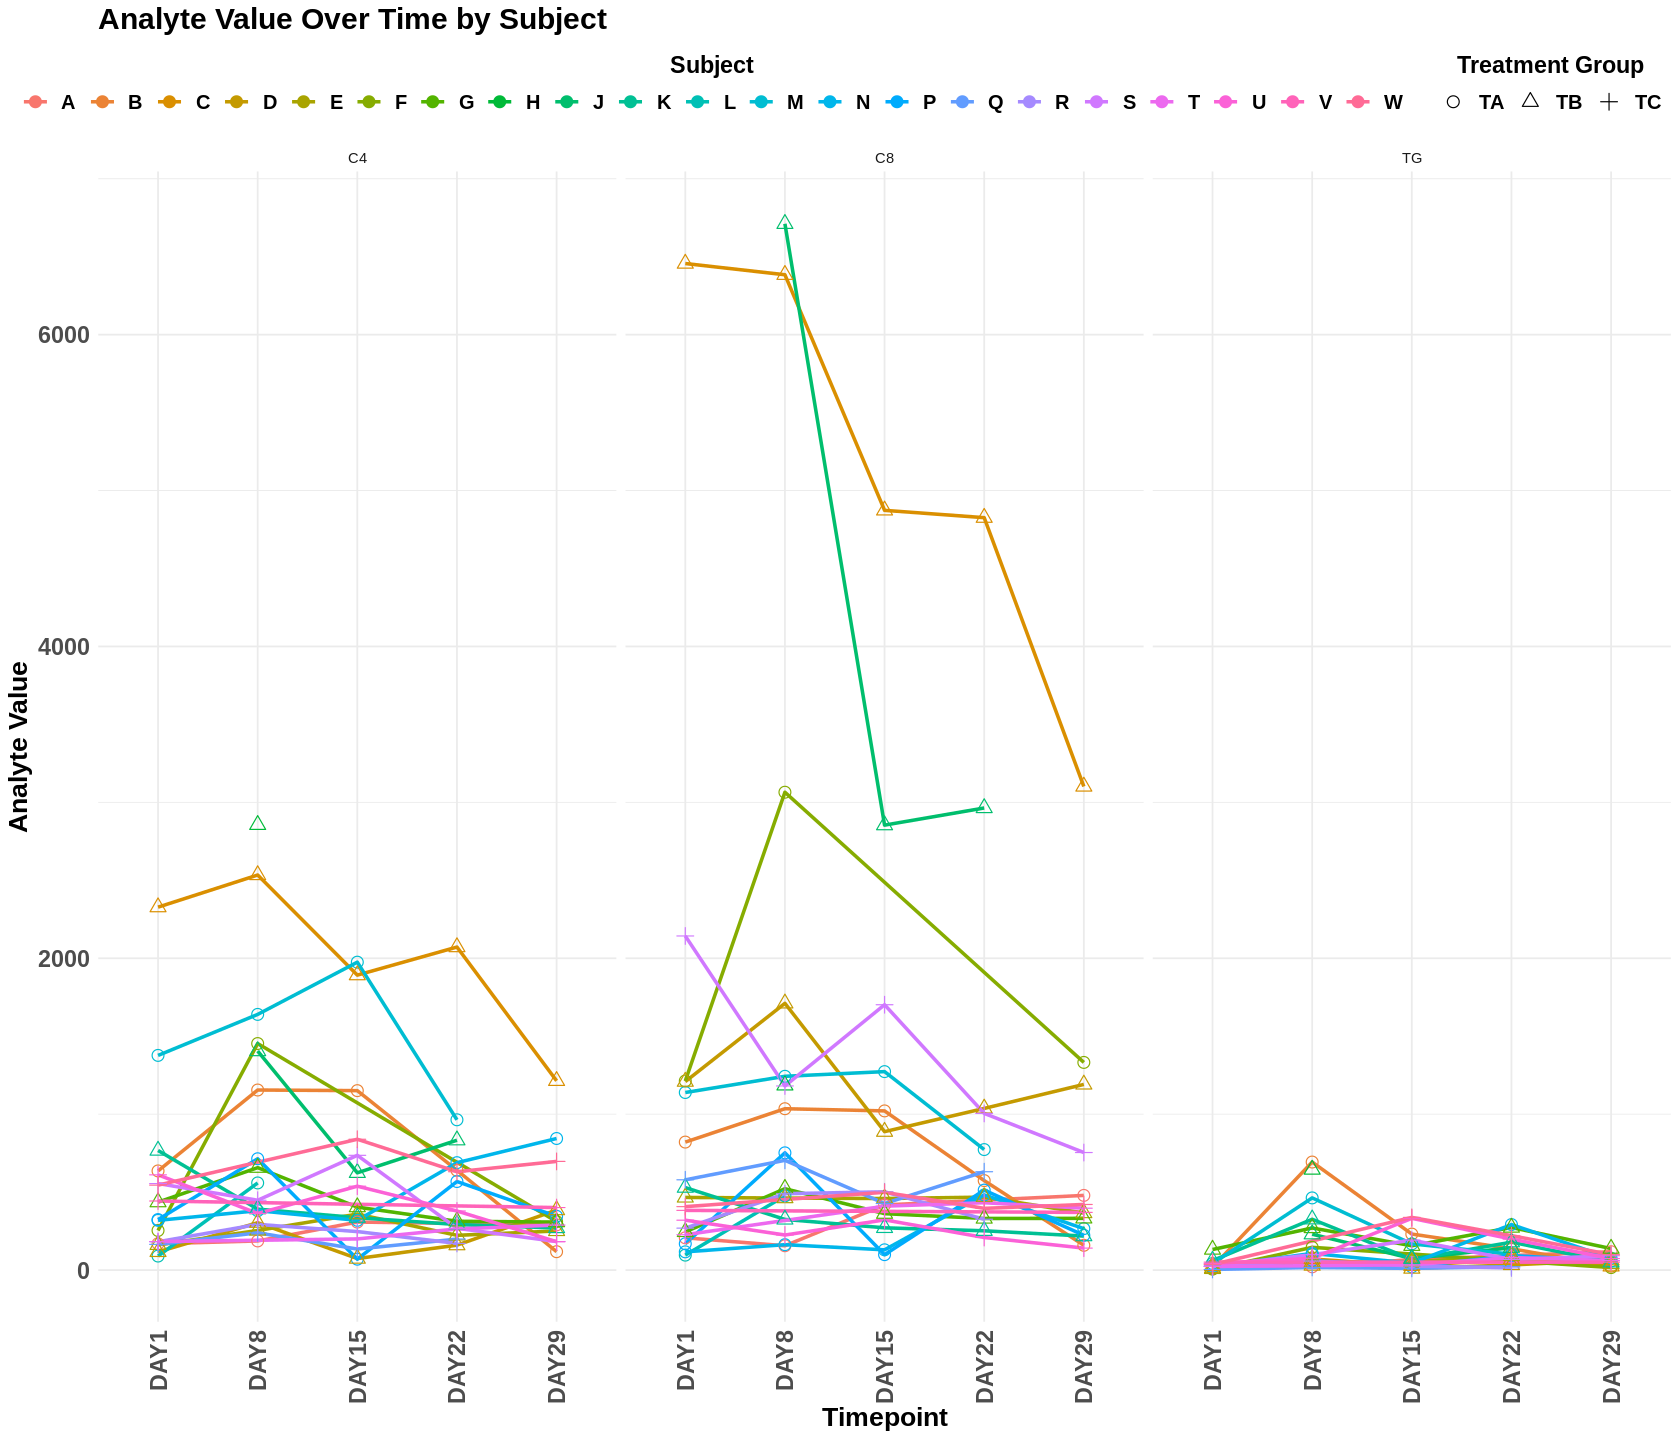

In [12]:
# Each subject is coded by a COLOR, the Treatment Group is code by a SHAPE

options(repr.plot.width = 14, repr.plot.height = 12)

p <- ggplot(x, aes(x = timepoint, y = analyte_value, group = subject, color = subject, shape = treatment_group)) +
  geom_line(size = 1) +  # Line for each subject, colored by subject
  geom_point(size = 3) +  # Points for each measurement, shaped by treatment group
  facet_wrap(~ marker) +  # Faceting by marker
  labs(title = "Analyte Value Over Time by Subject", x = "Timepoint", y = "Analyte Value") +
  scale_shape_manual(values = shape_values) +  # Apply custom shapes
  theme_minimal() +
  theme(
    legend.position = "top",  # Position legends at the top
    legend.box = "horizontal",  # Arrange legends horizontally
    legend.justification = c(1, 1),  # Justify legend to the top right
    axis.text.x = element_text(size = 14, angle = 90, vjust = 0.5, hjust = 1, face = "bold"),  # Increase size and thickness of x-axis labels
    axis.text.y = element_text(size = 14, face = "bold"),  # Increase size and thickness of y-axis labels
    axis.title.x = element_text(size = 16, face = "bold"),  # Increase size and thickness of x-axis title
    axis.title.y = element_text(size = 16, face = "bold"),  # Increase size and thickness of y-axis title
    plot.title = element_text(size = 18, face = "bold"),  # Increase size and thickness of plot title
    legend.text = element_text(size = 12, face = "bold"),  # Increase size and thickness of legend text
    legend.title = element_text(size = 14, face = "bold")  # Increase size and thickness of legend title
  ) +
  guides(
    color = guide_legend(title = "Subject", title.position = "top", title.hjust = 0.5, nrow = 1),
    shape = guide_legend(title = "Treatment Group", title.position = "top", title.hjust = 0.5, nrow = 1)
  )

# Print the plot
print(p)

In [13]:
# 2. Please provide a version of the above graph as Mean ± SD with each treatment group’s mean connected by a line, 
# and a unique shape and color for each treatment group. 
# The objective is to understand how the mean analyte value for each group changes with treatment. 
# Use various features of the graphs to highlight different aspects.

In [14]:
# Calculate mean and SD for each combination of timepoint, marker, and treatment group

x_summary <- x %>%
  group_by(timepoint, marker, treatment_group) %>%
  summarise(
    mean_value = mean(analyte_value),
    sd_value = sd(analyte_value),
    .groups = 'drop'
  )

print(x_summary)

z = as.data.frame(x_summary)
head(z, 2)

# A tibble: 45 × 5
   timepoint marker treatment_group mean_value sd_value
   <fct>     <fct>  <fct>                <dbl>    <dbl>
 1 DAY1      C4     TA                   453.     442. 
 2 DAY1      C4     TB                   762      913. 
 3 DAY1      C4     TC                   383.     200. 
 4 DAY1      C8     TA                   537.     503. 
 5 DAY1      C8     TB                  1781     2638. 
 6 DAY1      C8     TC                   618.     682. 
 7 DAY1      TG     TA                    21       13.1
 8 DAY1      TG     TB                    48.2     51.2
 9 DAY1      TG     TC                    29.4     15.3
10 DAY8      C4     TA                   870.     554. 
# ℹ 35 more rows


,timepoint,marker,treatment_group,mean_value,sd_value
,<fct>,<fct>,<fct>,<dbl>,<dbl>
1,DAY1,C4,TA,452.7143,442.3210
2,DAY1,C4,TB,762.0000,913.0556


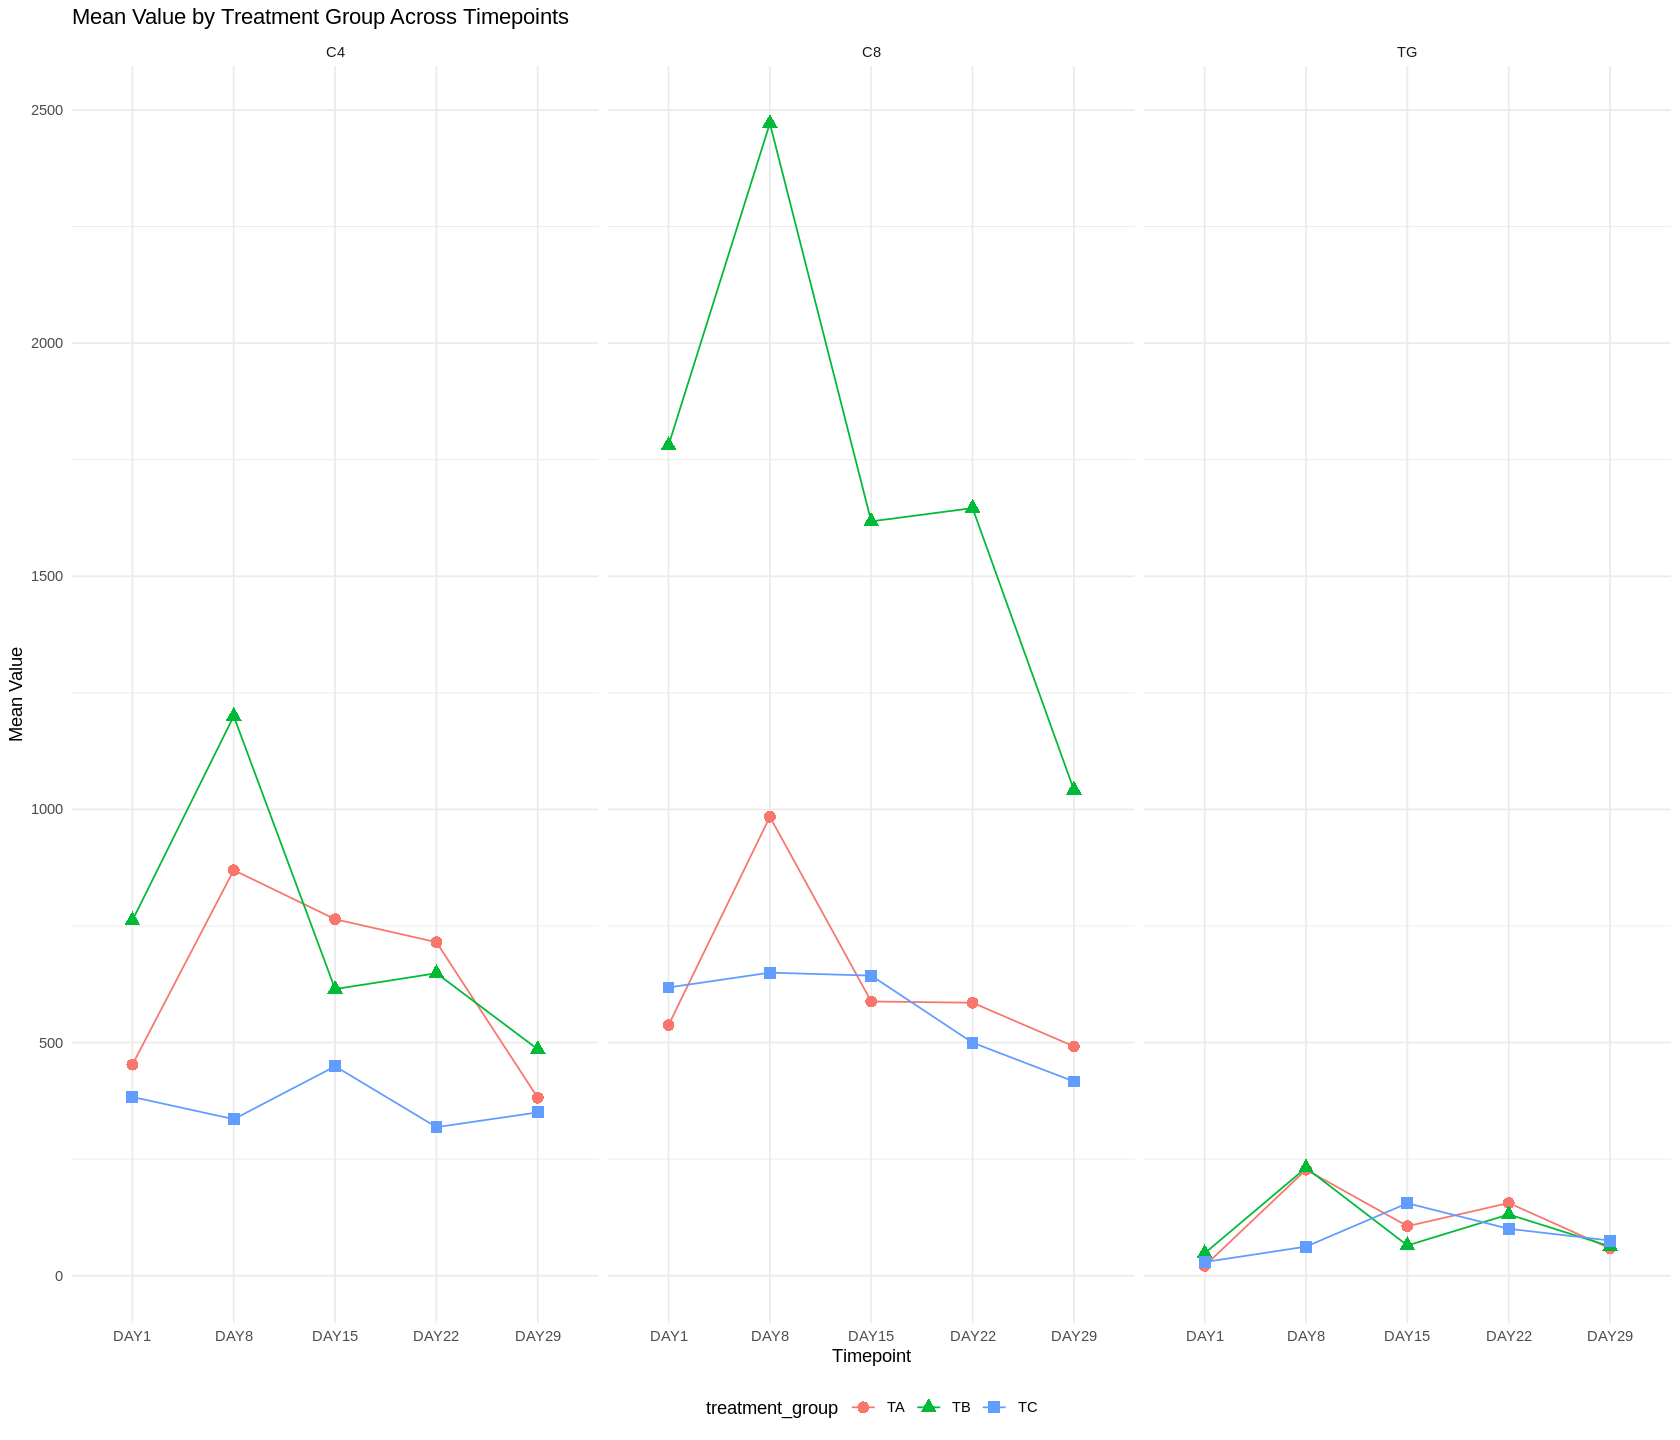

In [15]:
ggplot(z, aes(x = timepoint, y = mean_value, group = treatment_group, color = treatment_group, shape = treatment_group)) +
  geom_line() +
  geom_point(size = 3) +
  facet_wrap(~ marker) + 
  labs(
    x = "Timepoint",
    y = "Mean Value",
    title = "Mean Value by Treatment Group Across Timepoints"
  ) +
  theme_minimal() +
  theme(legend.position = "bottom") +
  scale_x_discrete(limits = c("DAY1", "DAY8", "DAY15", "DAY22", "DAY29")) 

In [16]:
# To visualize the mean_value along with mean_value ± sd_value on the plot, 
# we add shaded error bands around the lines by using geom_ribbon() in ggplot2, 
# which allows us to create shaded areas representing the standard deviation

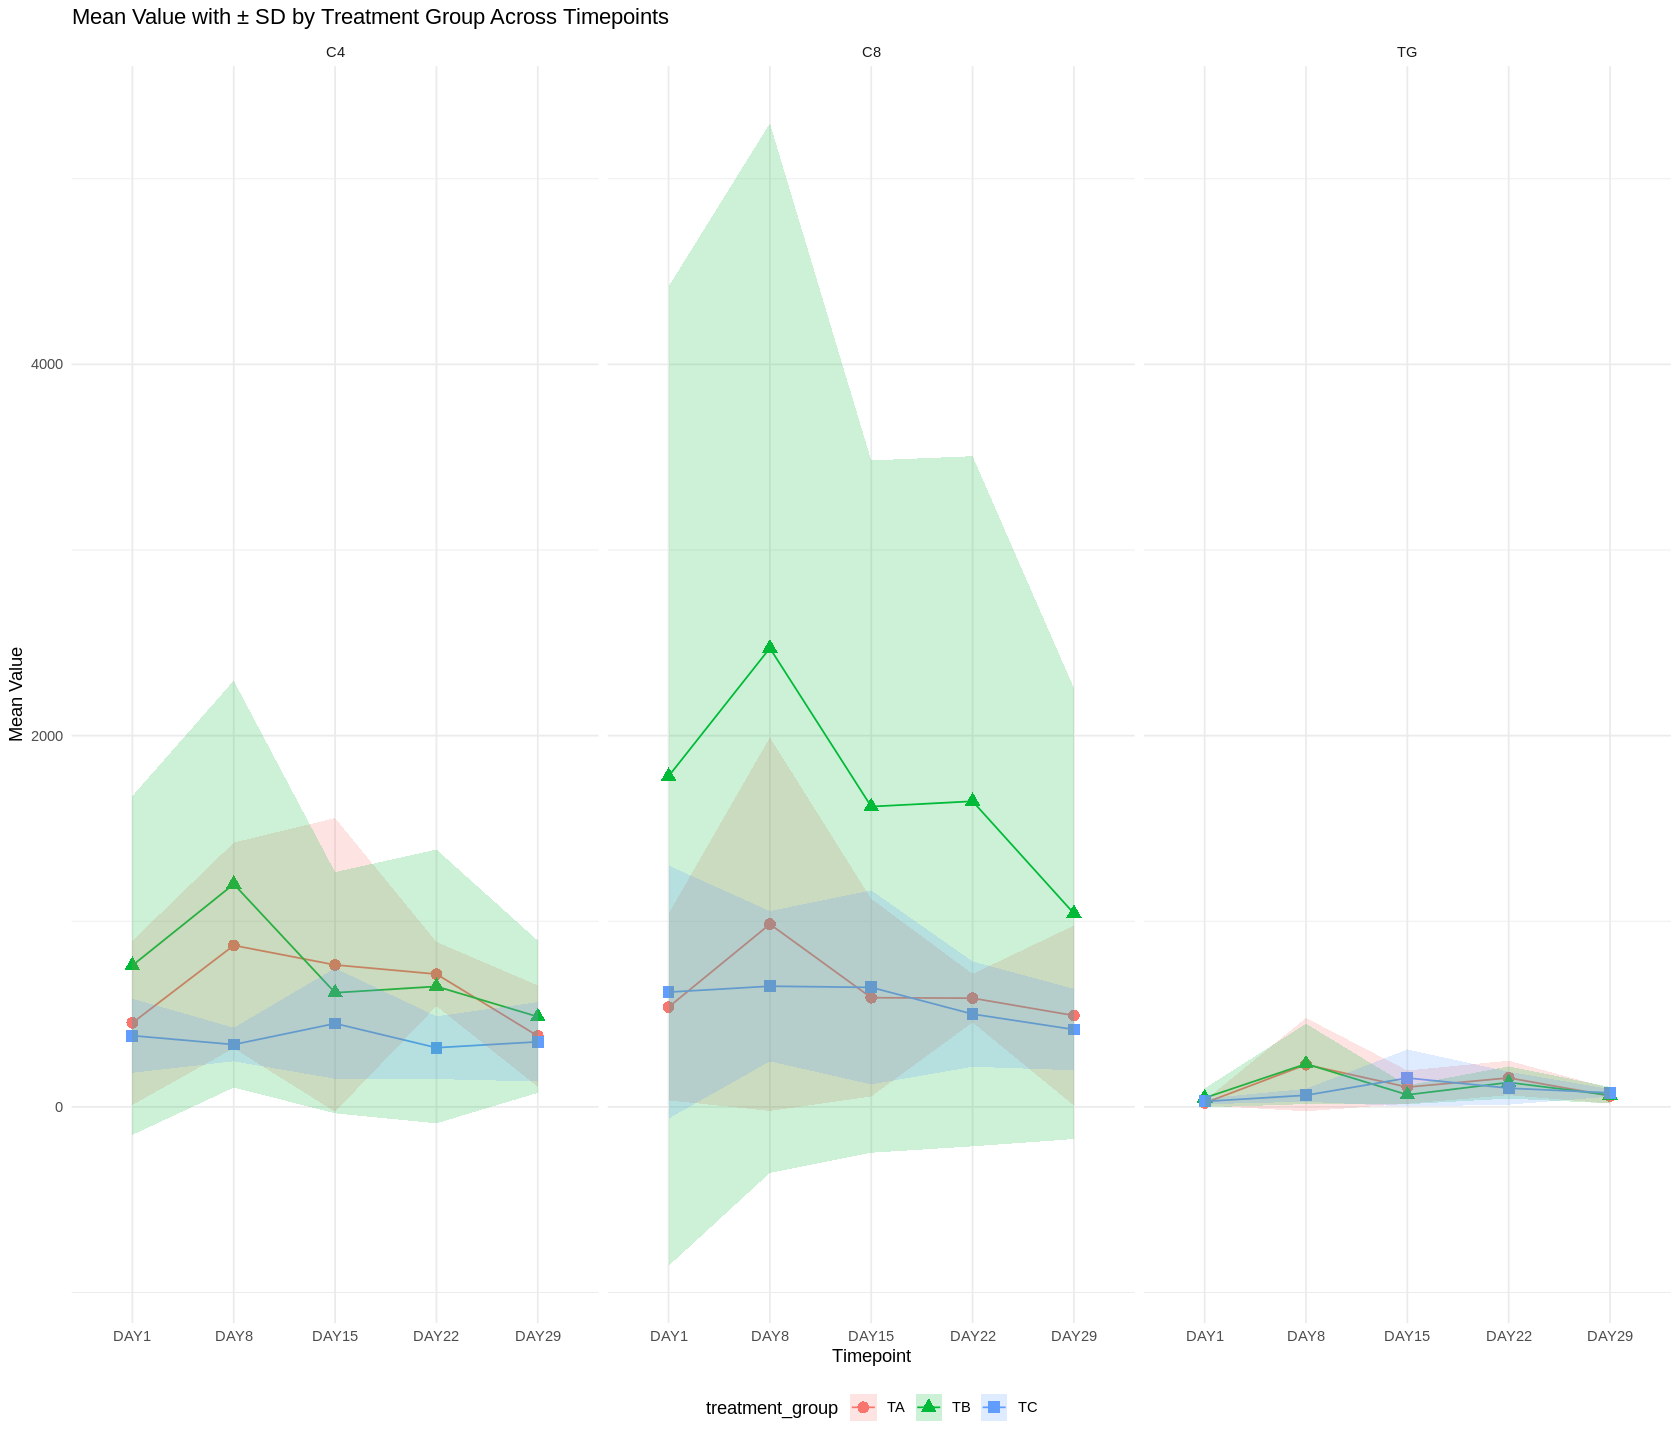

In [17]:
ggplot(z, aes(x = timepoint, y = mean_value, group = treatment_group, color = treatment_group, shape = treatment_group)) +
  geom_line() +
  geom_point(size = 3) +
  geom_ribbon(aes(ymin = mean_value - sd_value, ymax = mean_value + sd_value, fill = treatment_group), alpha = 0.2, color = NA) +
  facet_wrap(~ marker) + 
  labs(
    x = "Timepoint",
    y = "Mean Value",
    title = "Mean Value with ± SD by Treatment Group Across Timepoints"
  ) +
  theme_minimal() +
  theme(legend.position = "bottom") +
  scale_x_discrete(limits = c("DAY1", "DAY8", "DAY15", "DAY22", "DAY29")) # Ensures timepoints are ordered


In [18]:
# 3. Please convert the input data table to another table in which each timepoint become a separate column filled 
# with corresponding analyte values and other columns remain.

In [19]:
# we could reformat the data by using either the package "reshape2", or dplyr / tidyr (tidyverse collection)

In [20]:
# to reformat the data by using reshape2 package :

x_wide <- reshape(
  x,
  idvar = c("subject", "marker", "treatment_group"),  # Variables to keep constant
  timevar = "timepoint",                              # Variable that will become columns
  direction = "wide",                                 # Convert from long to wide format
  v.names = "analyte_value"                           # Values to spread across the new columns
)

# Print the transformed data
colnames(x_wide)
head(x_wide, 2)
tail(x_wide, 2)

# Another way to reformat by using tidyverse / dplyr / tidyr functions
xy_wide <- x %>%
 pivot_wider(
    names_from = timepoint,
    values_from = analyte_value,
    names_prefix = "analyte_value."
  )

# Print the transformed data
colnames(xy_wide)
head(xy_wide, 2)
tail(xy_wide, 2)

[1] "subject"             "marker"              "treatment_group"    
[4] "analyte_value.DAY1"  "analyte_value.DAY15" "analyte_value.DAY22"
[7] "analyte_value.DAY29" "analyte_value.DAY8"

,subject,marker,treatment_group,analyte_value.DAY1,analyte_value.DAY15,analyte_value.DAY22,analyte_value.DAY29,analyte_value.DAY8
,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>
1,A,C4,TA,169,308,NA,290,187
2,A,C8,TA,207,418,NA,479,156


,subject,marker,treatment_group,analyte_value.DAY1,analyte_value.DAY15,analyte_value.DAY22,analyte_value.DAY29,analyte_value.DAY8
,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>
190,W,C8,TC,407,499,396,421,NA
191,W,TG,TC,36,338,221,99,NA


[1] "subject"             "marker"              "treatment_group"    
[4] "analyte_value.DAY1"  "analyte_value.DAY15" "analyte_value.DAY22"
[7] "analyte_value.DAY29" "analyte_value.DAY8"

subject,marker,treatment_group,analyte_value.DAY1,analyte_value.DAY15,analyte_value.DAY22,analyte_value.DAY29,analyte_value.DAY8
<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>
A,C4,TA,169,308,NA,290,187
A,C8,TA,207,418,NA,479,156


subject,marker,treatment_group,analyte_value.DAY1,analyte_value.DAY15,analyte_value.DAY22,analyte_value.DAY29,analyte_value.DAY8
<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<int>
W,C8,TC,407,499,396,421,NA
W,TG,TC,36,338,221,99,NA
